In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)

/var/folders/_h/vhfb2h1n6v35yb9bys91j37m0000gn/T/ipykernel_43474/1227858783.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data Exploration

In [3]:
# Load in the data
df = pd.read_csv("data/ufc.csv")

# Our data shows that we have very little spaces that show null values in any of the columns
df.isna().sum()

#Check the columns in my dataset, all have relevance but we can cut down on some in the cleaning part
df.columns

#See if there are any duplicated fighters / fights in my dataset
df.duplicated

#Data looks good to go




<bound method DataFrame.duplicated of                    Location            Fighter 1        Fighter 2  \
0        Austin, Texas, USA      Arman Tsarukyan   Beneil Dariush   
1        Austin, Texas, USA         Jalin Turner      Bobby Green   
2        Austin, Texas, USA  Deiveson Figueiredo         Rob Font   
3        Austin, Texas, USA           Sean Brady  Kelvin Gastelum   
4        Austin, Texas, USA        Joaquim Silva       Clay Guida   
...                     ...                  ...              ...   
7412  Denver, Colorado, USA         Orlando Wiet   Sean Daugherty   
7413  Denver, Colorado, USA        Frank Hamaker              NaN   
7414  Denver, Colorado, USA        Johnny Rhodes              NaN   
7415  Denver, Colorado, USA        Patrick Smith              NaN   
7416  Denver, Colorado, USA         Scott Morris              NaN   

      Fighter_1_KD  Fighter_2_KD  Fighter_1_STR  Fighter_2_STR  Fighter_1_TD  \
0              1.0           0.0            8.0      

## Data Cleaning

In [4]:
#Lets delete Fighter_1_SUB and Fighter 2 sub, these aren't as interesting as sig strikes or takedowns. I think every other column is pretty relevant
df = df[['Location', 'Fighter 1', 'Fighter 2', 'Fighter_1_KD', 'Fighter_2_KD',
       'Fighter_1_STR', 'Fighter_2_STR', 'Fighter_1_TD', 'Fighter_2_TD', 
        'Weight_Class', 'Method', 'Round', 'Time', 'Event Name', 'Date', 'Winner']]

#Lets also see if any of the columns are formatted differently when they want to say the same thing. I will only do the most important columns that have relevance 
df["Location"].value_counts()
df["Method"].value_counts()
df["Event Name"].value_counts()
df["Fighter 1"].value_counts()
df["Fighter 2"].value_counts()

#I'll also check for null values, looks like we only have at most 4 null values in a column so we do not need to delete the whole column. 
df.isna().sum()

#The Null Values in Fighter Takedowns, Knockdowns, and Significant Strikes might just mean they had zero strikes during that round. These would be significant and we shouldn't delete these, so I'll turn them into zeros. 
df["Fighter_1_KD"] = df["Fighter_1_KD"].fillna(0.0)
df["Fighter_2_KD"] = df["Fighter_2_KD"].fillna(0.0)
df["Fighter_1_STR"] = df["Fighter_1_STR"].fillna(0.0)
df["Fighter_2_STR"] = df["Fighter_2_STR"].fillna(0.0)
df["Fighter_1_TD"] = df['Fighter_1_TD'].fillna(0.0)
df["Fighter_2_TD"] = df["Fighter_2_TD"].fillna(0.0)

df.isna().sum()

#I also want to drop the fights where the other fighter was null. I am pretty sure this is due to one of the fighters not making weight. 
df = df.dropna(subset = ["Fighter 1"])
df = df.dropna(subset = ["Fighter 2"])

/var/folders/_h/vhfb2h1n6v35yb9bys91j37m0000gn/T/ipykernel_43474/178202677.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Fighter_1_KD"] = df["Fighter_1_KD"].fillna(0.0)
/var/folders/_h/vhfb2h1n6v35yb9bys91j37m0000gn/T/ipykernel_43474/178202677.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Fighter_2_KD"] = df["Fighter_2_KD"].fillna(0.0)
/var/folders/_h/vhfb2h1n6v35yb9bys91j37m0000gn/T/ipykernel_43474/178202677.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

## Exploratory Data Analysis

For a graph, I would want to take a look at the distribution of how most fights ended. 

In [5]:
"k" in "ok"

True

<Axes: xlabel='Method', ylabel='Count'>

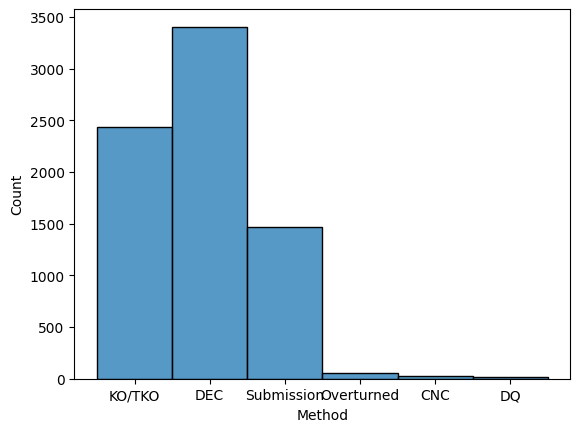

In [22]:
df["Method"].value_counts()

#Because there are so many different types of submissions, I want to filter them down to a few. 


#Organize my words to group them together
def organize_tko_ko(word):
    if "KO/TKO" in word:
        return "KO/TKO"
    else:
        return word
    
def organize_sub(word):
    if "SUB" in word:
        return "Submission"
    else:
        return word
    
def organize_overturned(word):
    if "Overturned" in word:
        return "Overturned"
    else:
        return word
    
def organize_overturned(word):
    if "Overturned" in word:
        return "Overturned"
    else:
        return word

def organize_DQ(word):
    if "DQ" in word:
        return "DQ"
    else:
        return word
    
def organize_dec(word):
    if "DEC" in word:
        return "DEC"
    else:
        return word
    
def organize_other(word):
    if "Other" in word:
        return "DEC"
    else:
        return word

#Apply the methods to method   
df["Method"] = df["Method"].map(organize_tko_ko)
df["Method"] = df["Method"].map(organize_sub)
df["Method"] = df["Method"].map(organize_overturned)
df["Method"] = df["Method"].map(organize_DQ)
df["Method"] = df["Method"].map(organize_dec)
df["Method"] = df["Method"].map(organize_other)
df["Method"].value_counts()
df.sort_values('Method', ascending=True)

#Lets Draw Our Boxplot
sns.set_context(font_scale=0.3)
sns.histplot(data=df, x="Method")
